In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_linalol_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Linalool
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.5000
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.5000
2,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.5000
3,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.5000
4,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0625
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0625
74997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0625
74998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0625


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Linalool'], axis = 1)
y = df_rf[['X..Linalool']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.5   ],
       [0.5   ],
       [0.5   ],
       ...,
       [0.0625],
       [0.0625],
       [0.0625]])

<Axes: ylabel='Count'>

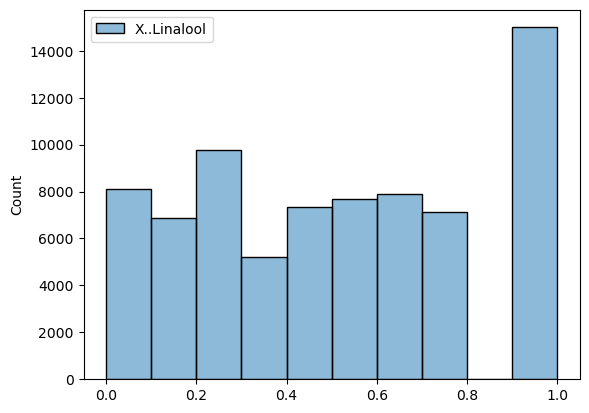

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_4060/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.036877768955267995

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.006181291668096394

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07862119096081154

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9828764296014347

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9379997075606002

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.108706
1,lsa_1,0.091060
2,lsa_2,0.083020
3,lsa_3,0.082050
4,lsa_4,0.091344
...,...,...
81,tree,0.000446
82,tropical,0.001138
83,vanilla,0.001494
84,violet,0.000097


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
5,hybrid,2.319605e-01
0,lsa_0,1.087065e-01
4,lsa_4,9.134363e-02
1,lsa_1,9.106041e-02
2,lsa_2,8.302021e-02
3,lsa_3,8.205048e-02
45,cheese,2.371999e-02
68,pine,2.071725e-02
51,earthy,1.635464e-02
64,orange,1.557142e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([1.09945451e-01, 8.99419501e-02, 8.26175908e-02, 8.14599450e-02,
       9.39914846e-02, 2.32330678e-01, 1.34443520e-03, 1.63858512e-03,
       4.45142776e-05, 2.00823118e-03, 7.37442298e-03, 8.18658143e-08,
       9.87765659e-03, 2.77492151e-05, 1.46351240e-03, 5.62356328e-03,
       6.12365967e-03, 7.87352481e-03, 2.22679773e-08, 7.28188842e-03,
       2.01708975e-07, 1.05562080e-07, 4.34839787e-03, 7.14537405e-03,
       1.29549494e-02, 9.61371342e-04, 4.80689307e-03, 4.35248264e-05,
       2.84745726e-07, 1.30204590e-03, 1.19784703e-02, 6.05102643e-08,
       1.06902778e-02, 0.00000000e+00, 0.00000000e+00, 4.58263030e-03,
       1.14212113e-02, 7.12726576e-03, 8.72706001e-04, 7.65478588e-04,
       2.46753622e-05, 3.34420771e-03, 2.78687659e-04, 1.15114577e-02,
       1.23474425e-03, 2.37103974e-02, 1.61971885e-03, 1.50037001e-03,
       3.77055298e-03, 2.04811986e-03, 9.78714634e-03, 1.61068955e-02,
       5.13541258e-03, 5.15410663e-04, 3.97915961e-03, 6.57477119e-04,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,happy,relaxed,cheese,earthy,honey,orange,pine,sweet
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,1,0,0,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,1,0,0,0,0,0,0
2,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,1,1,1,0,0,0,0,0
3,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,1,1,1,0,0,0,0,0
4,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,0,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,1,0,0,0,0,0,0
74997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,1,0,0,0,0,0,0
74998,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,1,0,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_linalol.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_linalol.pkl")

['selected_X_rf_lsa_elbow_linalol.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_4060/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03912944073425985

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.00676131424704873

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08222721111073103

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9773803620737438

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9324510063056475

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_linalol.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_linalol.pkl")

['rscv_rf_lsa_elbow_best_params_linalol.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_4060/2826620419.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03794793669682502

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.006339843121408505

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07962313182366357

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9780800171437942

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.936661718804427

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_linalol.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_linalol.pkl")

['y_test_rfreg_lsa_elbow_linalol.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.037818756337487505

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.006473874546897029

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.08046039116793448

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9356464293636334

Error analysis

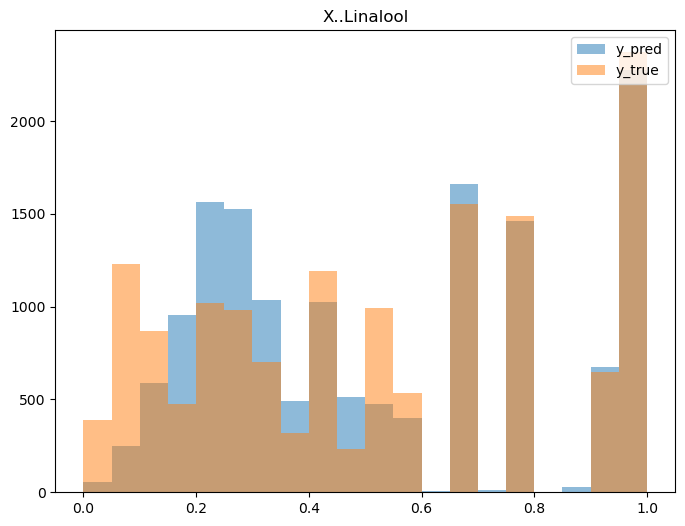

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Linalool"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_linalol.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.969
P-value: 0.000


<Axes: >

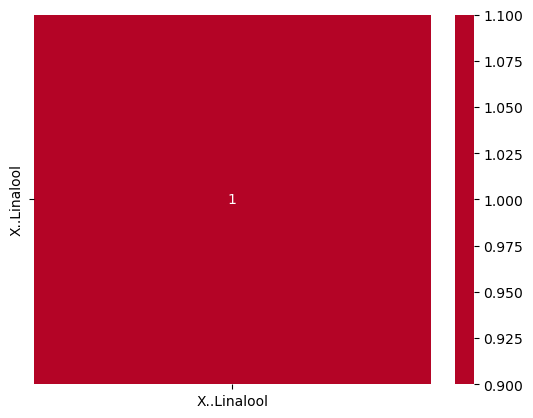

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)